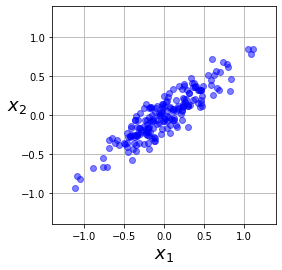

In [1]:
import numpy as np
import matplotlib.pyplot as plt

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

plt.figure(figsize=(4,4))
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

### Feature scaling

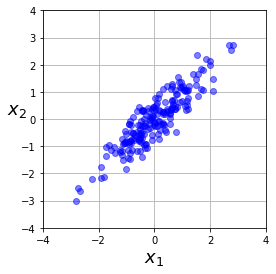

In [2]:
from sklearn.preprocessing import StandardScaler

#1st pca along this line

X_scaled = StandardScaler().fit_transform(X)

plt.figure(figsize=(4,4))
plt.plot(X_scaled[:, 0], X_scaled[:, 1], "bo", alpha=0.5)
plt.axis([-4, 4, -4, 4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

### Covariance matrix

In [3]:
np.cov(X_scaled.T)

array([[1.00502513, 0.90575658],
       [0.90575658, 1.00502513]])

### Apply PCA

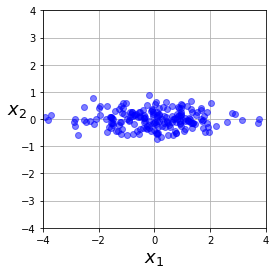

In [4]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)

X_pca = model.fit_transform(X_scaled) # use x scaled data, w_pca is new data in 2D space

plt.figure(figsize=(4,4))
plt.plot(X_pca[:, 0], X_pca[:, 1], "bo", alpha=0.5)
plt.axis([-4, 4, -4, 4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

rotation of data basically 

### Eigenvectors

In [5]:
model.components_ ## look at the eigenvectors 

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

1st one is 1st PC, moving to 2D. -.7,-.7 
45 degress along the data. Along this direction have most info

2nd PC is +.7,-.7
That is in the down right direction

### Variance along the PCs

In [6]:
model.explained_variance_ ## varience in new data space

array([1.9107817 , 0.09926855])

### Let's check the covariance matrix after PCA.

In [7]:
np.cov(X_pca.T) ## check if above results make sense

array([[ 1.91078170e+00, -1.71773329e-17],
       [-1.71773329e-17,  9.92685472e-02]])

varience of 1.9 which is the same, we have very small values, 10^-19

This tells us that the data isn't related. 1st PC and 2nd PC are perpendicular and so not coorelated

### Variance ratio along the PCs (i.e., importance of the "new" features)

In [8]:
model.explained_variance_ratio_ ## can check relative ratio 95% of varience along 1st PC, only 4.9% along 2nd PC

array([0.9506139, 0.0493861])

## Is PCA supervised or unsupervised learning?

unsupervised b/c no lables, only relies on input data. 1st unsupervised ML technique we've learned so far

Can use in combo w/ other ML techniques, ex random forest or SVM. Even use pipeline 

### Dimensionality reduction is effective in removing highly correlated features.

### Let's play with the breast cancer dataset.
This example is adopted from: https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b

In [9]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### We already learned that this dataset has highly correlated features. Let's plot correlation coefficients.

<AxesSubplot:>

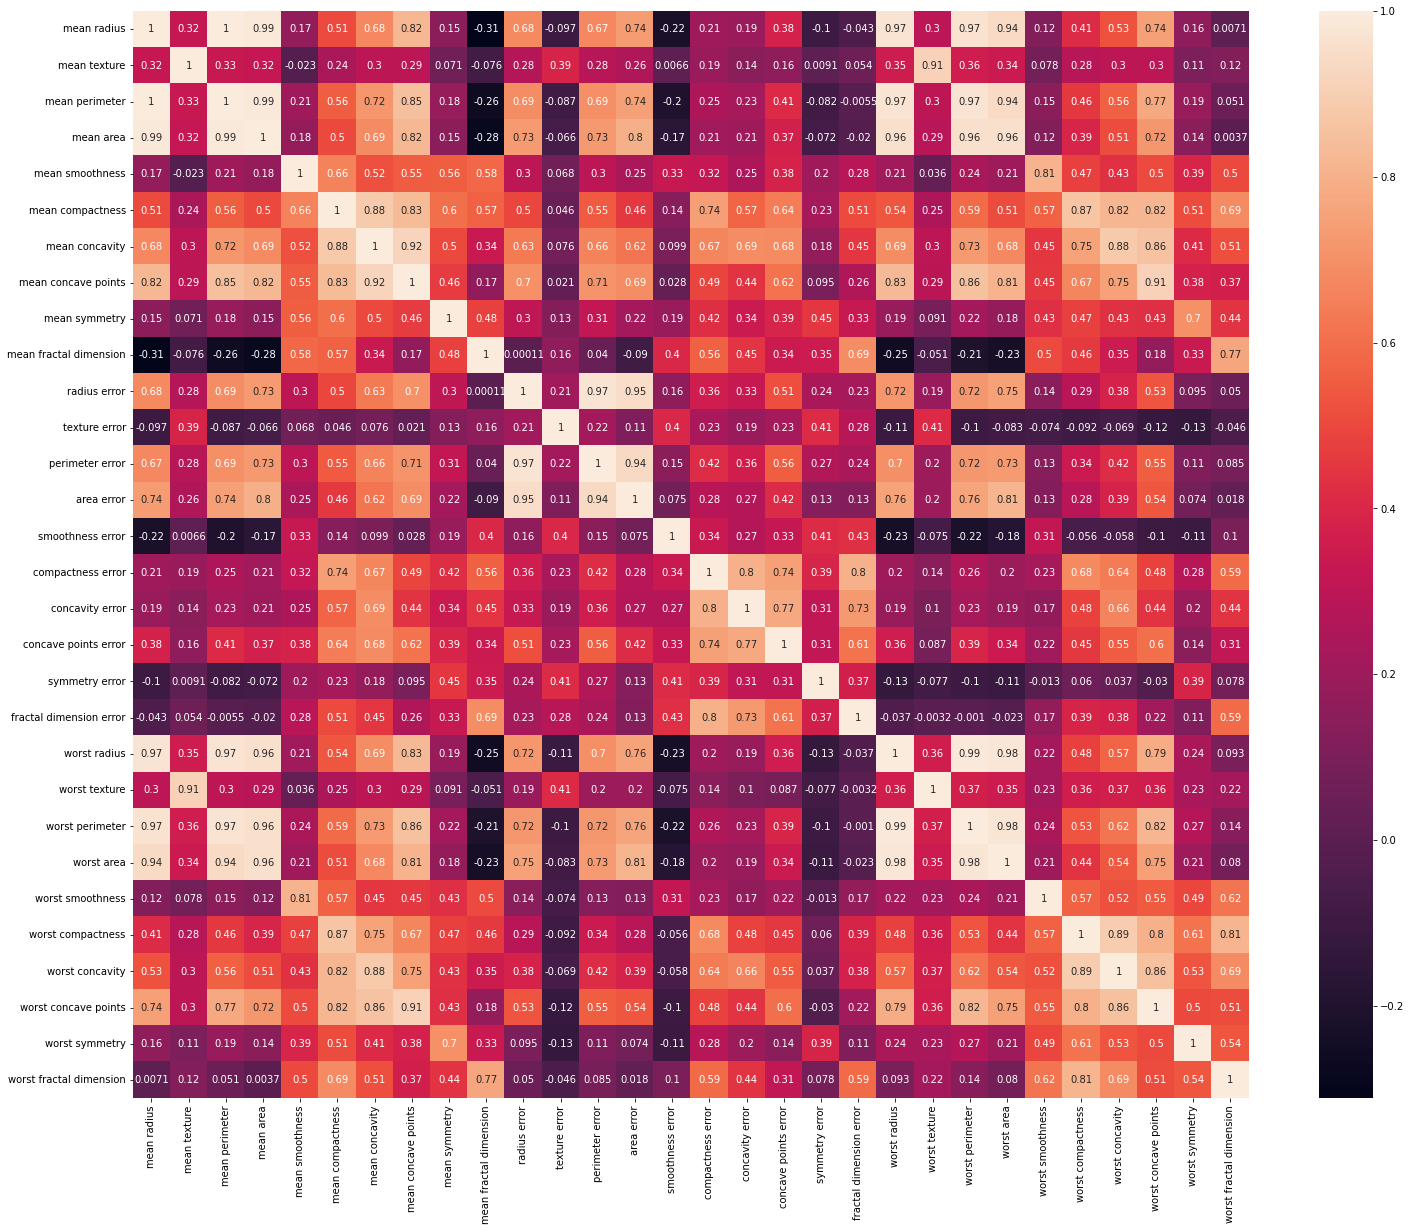

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True)

30 x 30 matrix. 30 features, looking at coorelation. Lighter color means higher coorelation. Along diagonal, mean radius vs
mean radius is same thing b/c they are the same feature. Otherwise, wee see worst radius and worst parameter are very coorelated


### Let's make a DT model and check the performance.

Test score: 0.90


Text(33.0, 0.5, 'True')

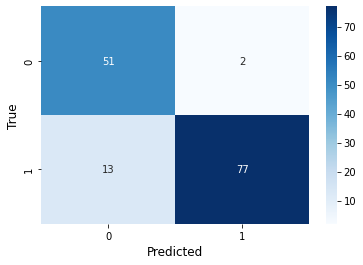

In [11]:
## w. orig data w/o dimensionality or scaling, build DT model
X = df
y = pd.Series(cancer.target)

# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test) 

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np

print("Test score: {:.2f}".format(model.score(X_test, y_test)))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### Let's check how many components we want in PCA

Variances (Percentage):
[4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]

Cumulative Variance (Percentage):
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]



Text(0, 0.5, 'Explained variance (%)')

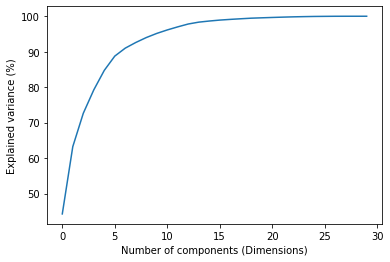

In [12]:
## reduce data in dimensonality using PCA

# feature scaling
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA

model = PCA() ## if u don't put anything, will use same dimensionality. Here it will create up to 30 PCs
              ## can specify .5, 50% of the dimensions so in this case, 15
model.fit(X_scaled)

# Get explained variances
print("Variances (Percentage):")
print(model.explained_variance_ratio_ * 100) ## varience ratio, tells us relitive importance/ammount of info in each PC
print()

print("Cumulative Variance (Percentage):")
print(np.cumsum(model.explained_variance_ratio_ * 100))
print()

# Make the scree plot
plt.plot(np.cumsum(model.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

From Variences array: Along 1st PC data has 44% of info. Along 2nd ~ 19% of varience/information

The plot tells us if we collapse data into 1D, we will have ~40% of orig info. If choose more and more up to 30, 
will get 100% varience (same as orig data). Want to choose inbetween to preserve  info but not too much.
Typically choose ~90%. Can use grid search.

If we want to keep 90% need at least 7 PC

In [13]:
## scaling again, doing so with 7 PC

# feature scaling
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7) ## 7 components

# This is the data in the "new" low-dimensional feature space.
X_pca = pca.fit_transform(X_scaled) ## gives transformed data in the 7D space
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1,2,3,4,5,6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411423,2.159370
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657,0.013364
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668156
3,7.122953,10.275589,-3.232790,0.152547,-2.960879,3.053423,1.429910
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936224
...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596119
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716320
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192755
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567935,0.223079


We don't know what these features are, some combination. 

### Let's check correlation coefficients of the transformed data.

<AxesSubplot:>

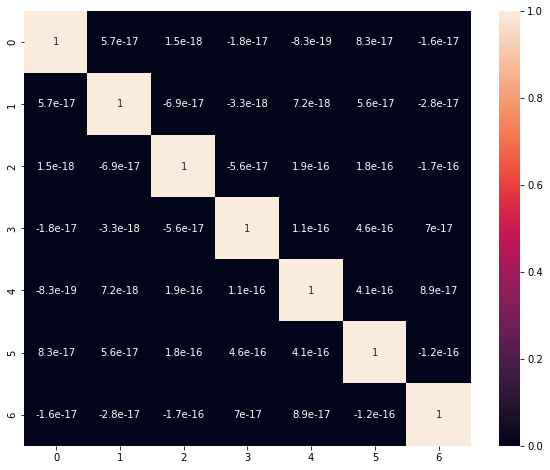

In [14]:
## plotting coorelation again w/ 7D data
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), annot=True)

All the data is not very coorelated. Found 7 orthogonal directions where 90% of data lies

### Another way to do this is to determine how much variance you'd like to keep.

In [15]:
## Another eay to do it is put .9 -> 90% of varience in new lower D space

# feature scaling
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

# Apply PCA, 90% variance
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9) ## don't have to manually choose dimensions

# This is the data in the "new" low-dimensional feature space.
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1,2,3,4,5,6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213
...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082


Again have 7 features

### Fractional variance and the number of components to achieve that fractional variance.

In [16]:
pca.n_components, pca.n_components_ ## can see how many demonsions the model chose (percentage of info, dimensions)

(0.9, 7)

### Let's make a DT model using the "PCA-ed" data.

Test score: 0.90

Test confusion_matrix


Text(33.0, 0.5, 'True')

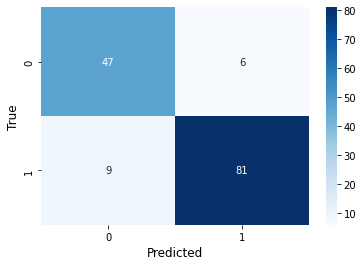

In [17]:
## Make DT w/ data after PCA

# PCA data divided into training and test dataset
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, random_state=0) 

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train the model
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca) # Predictions

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Test score: {:.2f}".format(model.score(X_test_pca, y_test)))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### Let's move to even higher-dimesional space.  We will use the MNIST dataset.

In [18]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [19]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

### To be filled: Let's make a kNN model without PCA. Print out running time and test score so that we can compare the performance.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time

X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)

tstart = time.time()

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)

print("Test score: {:.2f}".format(model.score(X_test, y_test)))
print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")

Test score: 0.94
Elapsed time: 39.16 seconds


### To be filled: Now let's apply PCA before we make a kNN model. Let's try to keep 90% variance.

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit(X_train).transform(X_train)

X_test_pca = pca.fit(X_train).transform(X_test)

tstart = time.time()

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_pca,y_train)

print("Test score: {:.2f}".format(model.score(X_test_pca, y_test)))
print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")

Test score: 0.95
Elapsed time: 26.04 seconds


### Q: How does the performance compare? What about the computing time?

Slightly better accuract, better time

### Q: How many components did you end up keeping?

In [27]:
pca.n_components 

0.9

### We can also compare how the images look like with only 90% of the original information.

In [28]:
# You can "inverse transform" the PCA-ed data.
X_inverse = pca.inverse_transform(X_train_pca)

### Let's make plots and compare images.

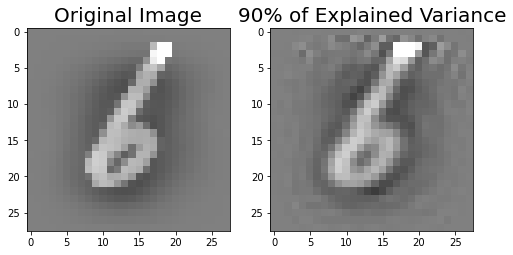

In [29]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X_train[2].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(-3, 3));
plt.title('Original Image', fontsize = 20);

plt.subplot(1, 2, 2);
plt.imshow(X_inverse[2].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(-3, 3));
plt.title('90% of Explained Variance', fontsize = 20);

### Now, let's plot some of the Eigenvectors.

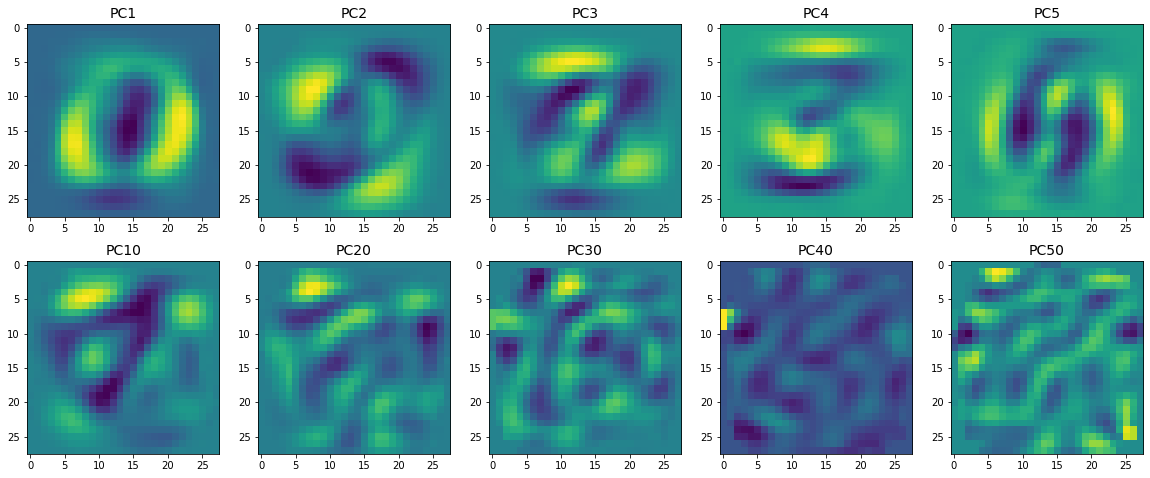

In [30]:
plt.figure(figsize=(20,8));

plt.subplot(2, 5, 1)
plt.imshow(pca.components_[0].reshape(28,28))
plt.title('PC1', fontsize = 14);

plt.subplot(2, 5, 2)
plt.imshow(pca.components_[1].reshape(28,28))
plt.title('PC2', fontsize = 14);

plt.subplot(2, 5, 3)
plt.imshow(pca.components_[2].reshape(28,28))
plt.title('PC3', fontsize = 14);

plt.subplot(2, 5, 4)
plt.imshow(pca.components_[3].reshape(28,28))
plt.title('PC4', fontsize = 14);

plt.subplot(2, 5, 5)
plt.imshow(pca.components_[4].reshape(28,28))
plt.title('PC5', fontsize = 14);

plt.subplot(2, 5, 6)
plt.imshow(pca.components_[9].reshape(28,28))
plt.title('PC10', fontsize = 14);

plt.subplot(2, 5, 7)
plt.imshow(pca.components_[19].reshape(28,28))
plt.title('PC20', fontsize = 14);

plt.subplot(2, 5, 8)
plt.imshow(pca.components_[29].reshape(28,28))
plt.title('PC30', fontsize = 14);

plt.subplot(2, 5, 9)
plt.imshow(pca.components_[39].reshape(28,28))
plt.title('PC40', fontsize = 14);

plt.subplot(2, 5, 10)
plt.imshow(pca.components_[49].reshape(28,28))
plt.title('PC50', fontsize = 14);


### Q: What does this mean?

Shows where the code deems is most important to look first when determining what number something is

### To be filled: make a RF without PCA

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, oob_score=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.oob_score_

0.9648761904761904

### To be filled: Now let's apply PCA before we make a RF model. Let's try to keep 90% variance.

In [ ]:
from sklearn.decomposition import PCA

### Q: How does the performance and test score compare with and without PCA?

In [1]:
planet = pd.read_csv('planetdata.csv', dtype = 'a')
planet

NameError: name 'pd' is not defined